## Computational gene-finding

### Getting started

Create a "R \[conda env:r_3.6\]" notebook in the "my_notebooks/week07" folder. Name this notebook "genefinding".

At any time if you want to stop, remember to "Save and Checkpoint" your notebook before doing "Close and Halt".

## The genetic code

The `tablecode` function in the `seqinr` packaage contains the standard genetic code.

In [1]:
library("seqinr")

Warning message:
“package ‘seqinr’ was built under R version 3.6.3”

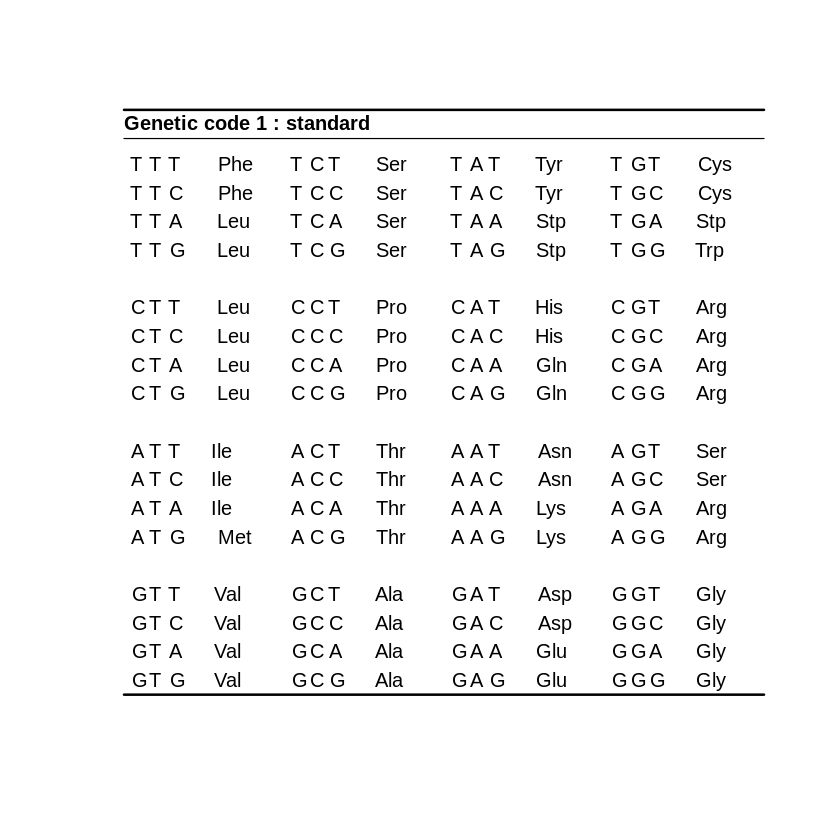

In [2]:
tablecode()

## Finding start and stop codons in a DNA sequence

The `matchPatterns` function in the `Biostrings` package finds all the occurrences of a sequence pattern in a sequence.

In [3]:
library("Biostrings")

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S4Vectors’

The followin

In [4]:
s1 <- "aaaatgcagtaacccatgccc"

In [5]:
matchPattern("atg",s1)

  Views on a 21-letter BString subject
subject: aaaatgcagtaacccatgccc
views:
    start end width
[1]     4   6     3 [atg]
[2]    16  18     3 [atg]

The `findPotentialStartsAndStops` function below finds all potential start and stop codons in a DNA sequence.  Copy and paste it into your notebook and evaluate the cell.

In [6]:
findPotentialStartsAndStops <- function(sequence) {
     # Define a vector with the sequences of potential start and stop codons
     codons            <- c("atg", "taa", "tag", "tga")
     # Find the number of occurrences of each type of potential start or stop codon
     for (i in 1:4)
     {
        codon <- codons[i]
        # Find all occurrences of codon "codon" in sequence "sequence"
        occurrences <- matchPattern(codon, sequence)
        # Find the start positions of all occurrences of "codon" in sequence "sequence"
        codonpositions <- start(occurrences)
        # Find the total number of potential start and stop codons in sequence "sequence"
        numoccurrences <- length(codonpositions)
        if (i == 1)
        {
           # Make a copy of vector "codonpositions" called "positions"
           positions <- codonpositions
           # Make a vector "types" containing "numoccurrences" copies of "codon"
           types <- rep(codon, numoccurrences)
        }
        else
        {
           # Add the vector "codonpositions" to the end of vector "positions":
           positions   <- append(positions, codonpositions, after=length(positions))
           # Add the vector "rep(codon, numoccurrences)" to the end of vector "types":
           types       <- append(types, rep(codon, numoccurrences), after=length(types))
        }
     }
     # Sort the vectors "positions" and "types" in order of position along the input sequence:
     indices <- order(positions)
     positions <- positions[indices]
     types <- types[indices]
     # Return a list variable including vectors "positions" and "types":
     mylist <- list(positions,types)
     return(mylist)
  }

In [7]:
s1 <- "aaaatgcagtaacccatgccc"
findPotentialStartsAndStops(s1)

[[1]]
[1]  4 10 16

[[2]]
[1] "atg" "taa" "atg"

Let's get a sequence from NCBI and try to use our function to find the start and stop codons. Recall we had this `getncbiseq` function previously for getting a sequence from a NCBI `db` using an `accession` number of your choice.

In [8]:
getncbiseq <- function(db,accession) {
    require("rentrez")
    require("seqinr")
    require("XML")
    res_xml <- entrez_fetch(db=db, id=accession, rettype="fasta",retmode="XML")
    res_list <- xmlToList(res_xml)
    res_seq <- res_list[[1]][['TSeq_sequence']]
    res_vec <- tolower(s2c(res_seq))
    return(res_vec)
}

Also recall the accession `NC_001477` in the `nuccore` database contains the whole genome sequence of the DEN-1 Dengue virus.

In [9]:
dengueseq <- getncbiseq("nuccore","NC_001477")

Loading required package: rentrez
Loading required package: XML


For simplicity, let's focus on the first 500 base pairs of this genome.

In [10]:
dengueseqstart <- dengueseq[1:500] # Take the first 500 nucleotides of the DEN-1 Dengue sequence
length(dengueseqstart)             # Find the length of the "dengueseqstart" start vector

[1] 500

In [11]:
dengueseqstart

[1] "a" "g" "t" "t" "g" "t" "t" "a" "g" "t" "c" "t" "a" "c" "g" "t" "g" "g"
 [19] "a" "c" "c" "g" "a" "c" "a" "a" "g" "a" "a" "c" "a" "g" "t" "t" "t" "c"
 [37] "g" "a" "a" "t" "c" "g" "g" "a" "a" "g" "c" "t" "t" "g" "c" "t" "t" "a"
 [55] "a" "c" "g" "t" "a" "g" "t" "t" "c" "t" "a" "a" "c" "a" "g" "t" "t" "t"
 [73] "t" "t" "t" "a" "t" "t" "a" "g" "a" "g" "a" "g" "c" "a" "g" "a" "t" "c"
 [91] "t" "c" "t" "g" "a" "t" "g" "a" "a" "c" "a" "a" "c" "c" "a" "a" "c" "g"
[109] "g" "a" "a" "a" "a" "a" "g" "a" "c" "g" "g" "g" "t" "c" "g" "a" "c" "c"
[127] "g" "t" "c" "t" "t" "t" "c" "a" "a" "t" "a" "t" "g" "c" "t" "g" "a" "a"
[145] "a" "c" "g" "c" "g" "c" "g" "a" "g" "a" "a" "a" "c" "c" "g" "c" "g" "t"
[163] "g" "t" "c" "a" "a" "c" "t" "g" "t" "t" "t" "c" "a" "c" "a" "g" "t" "t"
[181] "g" "g" "c" "g" "a" "a" "g" "a" "g" "a" "t" "t" "c" "t" "c" "a" "a" "a"
[199] "a" "g" "g" "a" "t" "t" "g" "c" "t" "t" "t" "c" "a" "g" "g" "c" "c" "a"
[217] "a" "g" "g" "a" "c" "c" "c" "a" "t" "g" "a" "a" "a" "t" "t" "g" "g" "t"
[235] "g" "a" "t" "g" "g" "c" "t" "t" "t" "t" "a" "t" "a" "g" "c" "a" "t" "t"
[253] "c" "c" "t" "a" "a" "g" "a" "t" "t" "t" "c" "t" "a" "g" "c" "c" "a" "t"
[271] "a" "c" "c" "t" "c" "c" "a" "a" "c" "a" "g" "c" "a" "g" "g" "a" "a" "t"
[289] "t" "t" "t" "g" "g" "c" "t" "a" "g" "a" "t" "g" "g" "g" "g" "c" "t" "c"
[307] "a" "t" "t" "c" "a" "a" "g" "a" "a" "g" "a" "a" "t" "g" "g" "a" "g" "c"
[325] "g" "a" "t" "c" "a" "a" "a" "g" "t" "g" "t" "t" "a" "c" "g" "g" "g" "g"
[343] "t" "t" "t" "c" "a" "a" "g" "a" "a" "a" "g" "a" "a" "a" "t" "c" "t" "c"
[361] "a" "a" "a" "c" "a" "t" "g" "t" "t" "g" "a" "a" "c" "a" "t" "a" "a" "t"
[379] "g" "a" "a" "c" "a" "g" "g" "a" "g" "g" "a" "a" "a" "a" "g" "a" "t" "c"
[397] "t" "g" "t" "g" "a" "c" "c" "a" "t" "g" "c" "t" "c" "c" "t" "c" "a" "t"
[415] "g" "c" "t" "g" "c" "t" "g" "c" "c" "c" "a" "c" "a" "g" "c" "c" "c" "t"
[433] "g" "g" "c" "g" "t" "t" "c" "c" "a" "t" "c" "t" "g" "a" "c" "c" "a" "c"
[451] "c" "c" "g" "a" "g" "g" "g" "g" "g" "a" "g" "a" "g" "c" "c" "g" "c" "a"
[469] "c" "a" "t" "g" "a" "t" "a" "g" "t" "t" "a" "g" "c" "a" "a" "g" "c" "a"
[487] "g" "g" "a" "a" "a" "g" "a" "g" "g" "a" "a" "a" "a" "t"

This is a *vector of individual characters*.  For the `findPotentialStartsAndStops` function we need a *string* of charaters.  We use the `c2s` function to make this conversion.  `dengueseqstartstring` now contains a *string* of the first 500 base parirs of the DEN-1 Dengue virus genome sequence.

In [12]:
dengueseqstartstring <- c2s(dengueseqstart) # Convert the vector "dengueseqstart" to a string of characters
dengueseqstartstring                        # Print out the variable string of characters "dengueseqstartstring"

[1] "agttgttagtctacgtggaccgacaagaacagtttcgaatcggaagcttgcttaacgtagttctaacagttttttattagagagcagatctctgatgaacaaccaacggaaaaagacgggtcgaccgtctttcaatatgctgaaacgcgcgagaaaccgcgtgtcaactgtttcacagttggcgaagagattctcaaaaggattgctttcaggccaaggacccatgaaattggtgatggcttttatagcattcctaagatttctagccatacctccaacagcaggaattttggctagatggggctcattcaagaagaatggagcgatcaaagtgttacggggtttcaagaaagaaatctcaaacatgttgaacataatgaacaggaggaaaagatctgtgaccatgctcctcatgctgctgcccacagccctggcgttccatctgaccacccgagggggagagccgcacatgatagttagcaagcaggaaagaggaaaat"

Now we can use the `findPotentialStartsAndStops` function to find where the start and stop codons are in the first 500 base pairs of the genome.

In [13]:
findPotentialStartsAndStops(dengueseqstartstring)

[[1]]
 [1]   7  53  58  64  78  93  95  96 137 141 224 225 234 236 246 255 264 295 298
[20] 318 365 369 375 377 378 399 404 413 444 470 471 474 478

[[2]]
 [1] "tag" "taa" "tag" "taa" "tag" "tga" "atg" "tga" "atg" "tga" "atg" "tga"
[13] "tga" "atg" "tag" "taa" "tag" "tag" "atg" "atg" "atg" "tga" "taa" "atg"
[25] "tga" "tga" "atg" "atg" "tga" "atg" "tga" "tag" "tag"

We can take a look at the sequence starting at 137 (position 1 of one of the 'atg' start codon) and ending at 143 (position 3 of the immediate downstream stop codon 'tga').

In [14]:
substring(dengueseqstartstring,137,143)

[1] "atgctga"

## Find open reading frames on the forward strand

The `plotPotentialStartsAndStops` function below plots the potential start and stop codon in the three different reading frames of a DNA sequence.

In [15]:
plotPotentialStartsAndStops <- function(sequence) {
     # Define a vector with the sequences of potential start and stop codons
     codons <- c("atg", "taa", "tag", "tga")
     # Find the number of occurrences of each type of potential start or stop codon
     for (i in 1:4)
     {
        codon <- codons[i]
        # Find all occurrences of codon "codon" in sequence "sequence"
        occurrences <- matchPattern(codon, sequence)
        # Find the start positions of all occurrences of "codon" in sequence "sequence"
        codonpositions <- start(occurrences)
        # Find the total number of potential start and stop codons in sequence "sequence"
        numoccurrences <- length(codonpositions)
        if (i == 1)
        {
           # Make a copy of vector "codonpositions" called "positions"
           positions   <- codonpositions
           # Make a vector "types" containing "numoccurrences" copies of "codon"
           types       <- rep(codon, numoccurrences)
        }
        else
        {
           # Add the vector "codonpositions" to the end of vector "positions":
           positions   <- append(positions, codonpositions, after=length(positions))
           # Add the vector "rep(codon, numoccurrences)" to the end of vector "types":
           types       <- append(types, rep(codon, numoccurrences), after=length(types))
        }
     }
     # Sort the vectors "positions" and "types" in order of position along the input sequence:
     indices <- order(positions)
     positions <- positions[indices]
     types <- types[indices]
     # Make a plot showing the positions of the start and stop codons in the input sequence:
     # Draw a line at y=0 from 1 to the length of the sequence:
     x  <- c(1,nchar(sequence))
     y <- c(0,0)
     plot(x, y, ylim=c(0,3), type="l", axes=FALSE, xlab="Nucleotide", ylab="Reading frame",
        main="Predicted start (red) and stop (blue) codons")
     segments(1,1,nchar(sequence),1)
     segments(1,2,nchar(sequence),2)
     # Add the x-axis at y=0:
     axis(1, pos=0)
     # Add the y-axis labels:
     text(0.9,0.5,"+1")
     text(0.9,1.5,"+2")
     text(0.9,2.5,"+3")
     # Draw in each predicted start/stop codon:
     numcodons <- length(positions)
     for (i in 1:numcodons)
     {
        position <- positions[i]
        type <- types[i]
        remainder <- (position-1) %% 3
        if    (remainder == 0) # +1 reading frame
        {
           if (type == "atg") { segments(position,0,position,1,lwd=1,col="red") }
           else               { segments(position,0,position,1,lwd=1,col="blue")}
        }
        else if (remainder == 1)
        {
           if (type == "atg") { segments(position,1,position,2,lwd=1,col="red") }
           else               { segments(position,1,position,2,lwd=1,col="blue")}
        }
        else if (remainder == 2)
        {
           if (type == "atg") { segments(position,2,position,3,lwd=1,col="red") }
           else               { segments(position,2,position,3,lwd=1,col="blue")}
        }
     }
   }

Let's try it on the first 500 bp of the DEN-1 Dengue virus genome.  Potential start codons are vertical red lines, and potential stop codons are vertial blue lines.

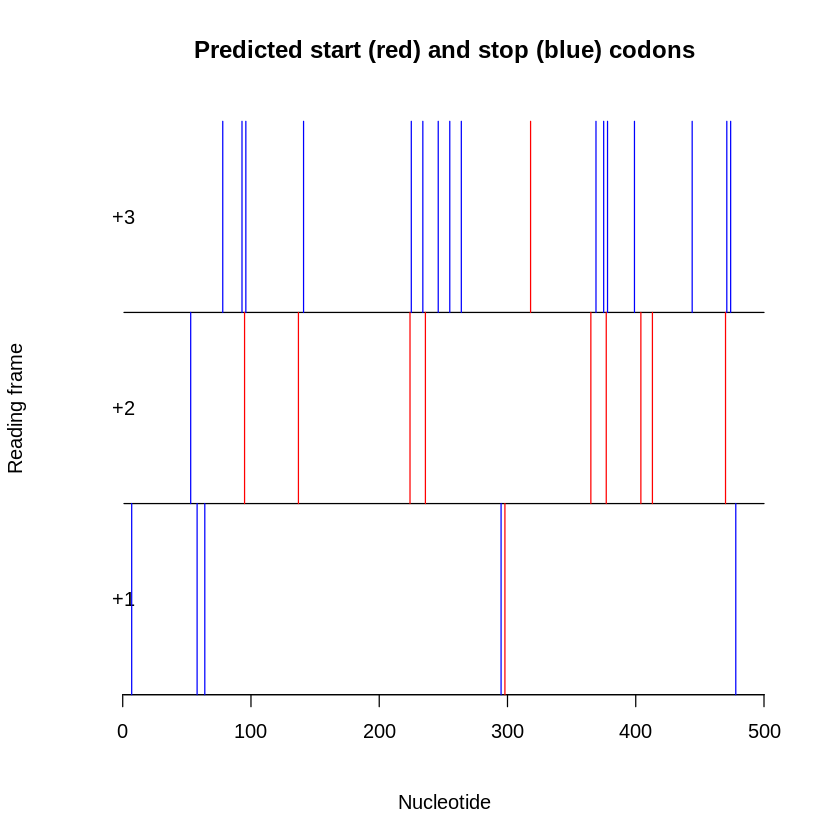

In [16]:
plotPotentialStartsAndStops(dengueseqstartstring)

Question: How to find a proper open reading frame (ORF)?


The `findORFsinSeq` function below finds ORFs in an input sequence

In [17]:
findORFsinSeq <- function(sequence) {
     require(Biostrings)
     # Make vectors "positions" and "types" containing information on the positions of ATGs in the sequence:
     mylist <- findPotentialStartsAndStops(sequence)
     positions <- mylist[[1]]
     types <- mylist[[2]]
     # Make vectors "orfstarts" and "orfstops" to store the predicted start and stop codons of ORFs
     orfstarts <- numeric()
     orfstops <- numeric()
     # Make a vector "orflengths" to store the lengths of the ORFs
     orflengths <- numeric()
     # Print out the positions of ORFs in the sequence:
     # Find the length of vector "positions"
     numpositions <- length(positions)
     # There must be at least one start codon and one stop codon to have an ORF.
     if (numpositions >= 2)
     {
        for (i in 1:(numpositions-1))
        {
           posi <- positions[i]
           typei <- types[i]
           found <- 0
           while (found == 0)
           {
              for (j in (i+1):numpositions)
              {
                 posj  <- positions[j]
                 typej <- types[j]
                 posdiff <- posj - posi
                 posdiffmod3 <- posdiff %% 3
                 # Add in the length of the stop codon
                 orflength <- posj - posi + 3
                 if (typei == "atg" && (typej == "taa" || typej == "tag" || typej == "tga") && posdiffmod3 == 0)
                 {
                    # Check if we have already used the stop codon at posj+2 in an ORF
                    numorfs <- length(orfstops)
                    usedstop <- -1
                    if (numorfs > 0)
                    {
                      for (k in 1:numorfs)
                      {
                          orfstopk <- orfstops[k]
                          if (orfstopk == (posj + 2)) { usedstop <- 1 }
                      }
                    }
                    if (usedstop == -1)
                    {
                       orfstarts <- append(orfstarts, posi, after=length(orfstarts))
                       orfstops <- append(orfstops, posj+2, after=length(orfstops)) # Including the stop codon.
                       orflengths <- append(orflengths, orflength, after=length(orflengths))
                    }
                    found <- 1
                    break
                 }
                 if (j == numpositions) { found <- 1 }
              }
           }
        }
     }
     # Sort the final ORFs by start position:
     indices <- order(orfstarts)
     orfstarts <- orfstarts[indices]
     orfstops <- orfstops[indices]
     # Find the lengths of the ORFs that we have
     orflengths <- numeric()
     numorfs <- length(orfstarts)
     for (i in 1:numorfs)
     {
        orfstart <- orfstarts[i]
        orfstop <- orfstops[i]
        orflength <- orfstop - orfstart + 1
        orflengths <- append(orflengths,orflength,after=length(orflengths))
     }
     mylist <- list(orfstarts, orfstops, orflengths)
     return(mylist)
  }

Let's try this function in a short sequence to understand the output.

This function *returns* a list of 3 elements: the first is a *vector* of the start positions of the ORFs, the second element is a *vector* of the end positions of the ORFs, and the third element is a *vector* of the lengths of the ORFs.

`s1` contains only one ORF.

In [29]:
s1 <- "aaaatgcagtaacccatgccc"
s1orfs <- findORFsinSeq(s1)
s1orfs

[[1]]
[1] 4

[[2]]
[1] 12

[[3]]
[1] 9

The first 500 nucleotides of the DEN-1 Dengue virus genome contains 2 ORFs.  What are their start, stop positions and lengths?

In [30]:
d1orfs <- findORFsinSeq(dengueseqstartstring)
d1orfs

[[1]]
[1] 298 318

[[2]]
[1] 480 371

[[3]]
[1] 183  54

How do we get only the start positions for all the ORFs?  Getting only the ORF lengths?

In [31]:
d1_starts <- d1orfs[[1]]
d1_starts

[1] 298 318

In [32]:
d1_lengths <- d1orfs[[3]]
d1_lengths

[1] 183  54

The `plotORFsinSeq` function below draws the ORFs in a sequence.

In [33]:
plotORFsinSeq <- function(sequence) {
     # Make vectors "positions" and "types" containing information on the positions of ATGs in the sequence:
     mylist <- findPotentialStartsAndStops(sequence)
     positions <- mylist[[1]]
     types <- mylist[[2]]
     # Make vectors "orfstarts" and "orfstops" to store the predicted start and stop codons of ORFs
     orfstarts <- numeric()
     orfstops <- numeric()
     # Make a vector "orflengths" to store the lengths of the ORFs
     orflengths <- numeric()
     # Print out the positions of ORFs in the sequence:
     numpositions <- length(positions) # Find the length of vector "positions"
     # There must be at least one start codon and one stop codon to have an ORF.
     if (numpositions >= 2)
     {
        for (i in 1:(numpositions-1))
        {
           posi <- positions[i]
           typei <- types[i]
           found <- 0
           while (found == 0)
           {
              for (j in (i+1):numpositions)
              {
                 posj <- positions[j]
                 typej <- types[j]
                 posdiff <- posj - posi
                 posdiffmod3 <- posdiff %% 3
                 orflength <- posj - posi + 3 # Add in the length of the stop codon
                 if (typei == "atg" && (typej == "taa" || typej == "tag" || typej == "tga") && posdiffmod3 == 0)
                 {
                    # Check if we have already used the stop codon at posj+2 in an ORF
                    numorfs <- length(orfstops)
                    usedstop <- -1
                    if (numorfs > 0)
                    {
                       for (k in 1:numorfs)
                       {
                          orfstopk <- orfstops[k]
                          if (orfstopk == (posj + 2)) { usedstop <- 1 }
                       }
                    }
                    if (usedstop == -1)
                    {
                       orfstarts <- append(orfstarts, posi, after=length(orfstarts))
                       orfstops <- append(orfstops, posj+2, after=length(orfstops)) # Including the stop codon.
                       orflengths <- append(orflengths, orflength, after=length(orflengths))
                    }
                    found <- 1
                    break
                 }
                 if (j == numpositions) { found <- 1 }
              }
           }
        }
     }
     # Sort the final ORFs by start position:
     indices <- order(orfstarts)
     orfstarts <- orfstarts[indices]
     orfstops <- orfstops[indices]
     # Make a plot showing the positions of ORFs in the input sequence:
     # Draw a line at y=0 from 1 to the length of the sequence:
     x <- c(1,nchar(sequence))
     y <- c(0,0)
     plot(x, y, ylim=c(0,3), type="l", axes=FALSE, xlab="Nucleotide", ylab="Reading frame", main="Predicted ORFs")
     segments(1,1,nchar(sequence),1)
     segments(1,2,nchar(sequence),2)
     # Add the x-axis at y=0:
     axis(1, pos=0)
     # Add the y-axis labels:
     text(0.9,0.5,"+1")
     text(0.9,1.5,"+2")
     text(0.9,2.5,"+3")
     # Make a plot of the ORFs in the sequence:
     numorfs <- length(orfstarts)
     for (i in 1:numorfs)
     {
        orfstart <- orfstarts[i]
        orfstop <- orfstops[i]
        remainder <- (orfstart-1) %% 3
        if    (remainder == 0) # +1 reading frame
        {
           rect(orfstart,0,orfstop,1,col="cyan",border="black")
        }
        else if (remainder == 1)
        {
           rect(orfstart,1,orfstop,2,col="cyan",border="black")
        }
        else if (remainder == 2)
        {
           rect(orfstart,2,orfstop,3,col="cyan",border="black")
        }
     }
  }

Let's plot the ORFs in the first 500 nucleotides of the DEN-1 Dengue virus genome.  Is it consistent with the outputs from  `findORFsinSeq` before?

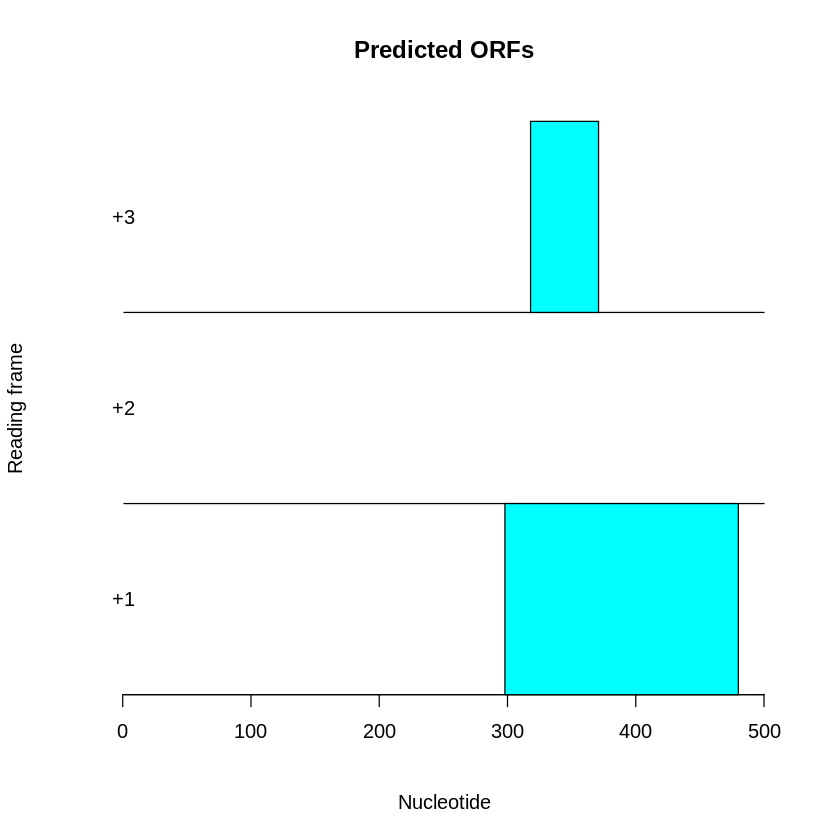

In [34]:
plotORFsinSeq(dengueseqstartstring)

## Breakout room exercises

1. The `rc_string` function below takes a DNA sequence string, and returns the reverse complement of the DNA sequence as a string. Use this function and other functions covered in class to find the number of ORFs in the reverse stand of the first 500 nucleotides of the DEN-1 Dengue virus genome.

2. How many ORFs are there on the forward strand of the DEN-1 Dengue virus genome?

3. What are the coordinates of the last ORF (the most 3' ORF) in the forward strand of the DEN-1 Dengue virus genome?

4. (asynchronous) Use the `seqinr::translate` function to find predicted protein sequence of the ORF from position 10705 to 10722 of the DEN-1 Dengue virus genome sequence.


In [24]:
rc_string <-function(fwd) {
    fwd_str <- DNAString(fwd)
    rc_str <- reverseComplement(fwd_str)
    return(rc_str)
}

## Solutions

In [25]:
dengueseqstartstring_rc <- rc_string(dengueseqstartstring)
findORFsinSeq(dengueseqstartstring_rc)

[[1]]
[1]  30  59 193 250

[[2]]
[1] 449 142 207 258

[[3]]
[1] 420  84  15   9

In [26]:
dengueseqstring <- c2s(dengueseq)
dengue_orfs <- findORFsinSeq(dengueseqstring)
orf_lengths <- dengue_orfs[[3]]
length(orf_lengths)

[1] 116

In [27]:
dengueseqstring <- c2s(dengueseq)
dengue_orfs <- findORFsinSeq(dengueseqstring)
starts <- dengue_orfs[[1]]
stops <- dengue_orfs[[2]]
starts[116]
stops[116]

[1] 10705

[1] 10722

In [28]:
orf_vec <- dengueseq[10705:10722]
seqinr::translate(orf_vec)

[1] "M" "E" "W" "C" "C" "*"